# Chapter 12. Matplotlib

In [17]:
#%matplotlib nbagg # 노트북상에 나타나는 그림을 Interactive 하게 조정가능. inline 일 경우 조정이 불가능.
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

## 라인 플롯(line plot)
 - 라인 플롯은 연속적인 직선으로 구성된 플롯입니다. 어떤 특정한 독립변수 X가 변화함에 따라 종속변수 Y가 어떻게 변화하는지를 나타내고자 할 때 라인 플롯을 사용합니다.

In [19]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.582378
10   -1.332458
20   -0.605413
30   -0.678848
40   -0.706273
50   -0.733335
60   -1.801117
70   -1.569956
80   -3.538710
90   -4.148673
dtype: float64

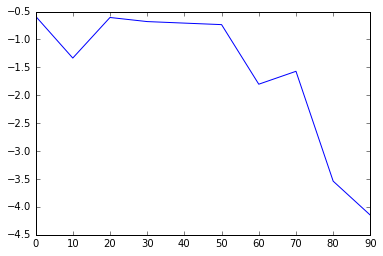

In [20]:
s.plot()
# plt.plot(s)

In [21]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(axis=0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.677290,-1.569316,-0.454460,1.556324
10,1.192299,-3.243554,-0.539903,1.286702
20,1.002136,-3.200792,0.133276,0.779162
30,2.088783,-2.715546,1.890067,1.241664
40,4.173214,-2.273155,2.369592,0.382438
50,4.104547,-2.327746,4.216643,1.082428
60,3.749753,-2.633471,1.653547,0.463495
70,2.110191,-2.447083,0.747315,0.348066
80,1.684133,-3.601009,0.928880,-0.240803
90,1.279591,-1.881976,2.080946,1.622919


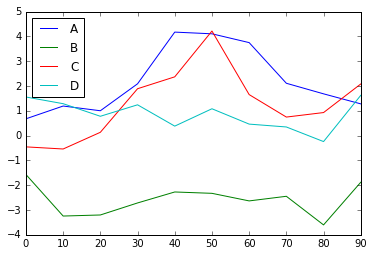

In [22]:
df.plot()
#plt.plot(df)

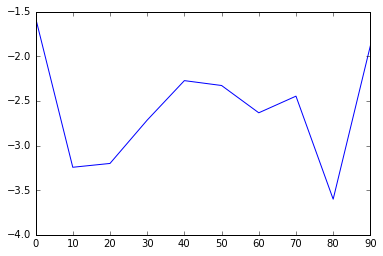

In [23]:
df["B"].plot()

## 바 플롯(bar plot)
 - 바 플롯은 막대 형태의 플롯입니다. 독립변수 X가 변화하면서 종속변수 Y가 변화하는 양상을 나타낼 때, <br> X가 연속적인 숫자에 해당하는 경우 라인 플롯을 그렸다면, X가 유한 개의 값만을 가질 경우 바 플롯을 사용하면 유용합니다.

In [24]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2

a    0.762064
b    0.128288
c    0.169566
d    0.465360
e    0.506500
f    0.958267
g    0.204321
h    0.680570
i    0.248717
j    0.347226
k    0.674462
l    0.200977
m    0.105645
n    0.583238
o    0.494941
p    0.988976
dtype: float64

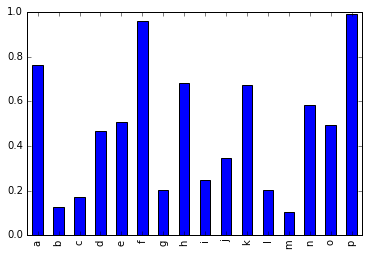

In [25]:
s2.plot(kind="bar")

- 만약 바 플롯을 수평 방향으로 그리고자 할 경우, s2.plot(kind="barh")를 실행하면 됩니다.

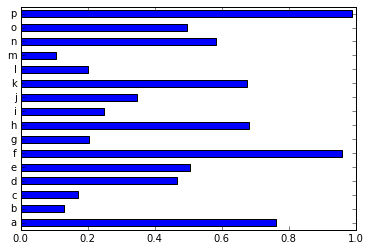

In [26]:
s2.plot(kind="barh")

In [27]:
df2 = pd.DataFrame(np.random.rand(6, 4), 
                   index=["one", "two", "three", "four", "five", "six"],
                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2

Genus,A,B,C,D
one,0.779892,0.841289,0.327070,0.802913
two,0.311741,0.749251,0.968131,0.567572
three,0.379297,0.950322,0.279051,0.742328
four,0.694776,0.396119,0.326851,0.934097
five,0.718483,0.598591,0.812179,0.565775
six,0.096116,0.300501,0.625186,0.815659


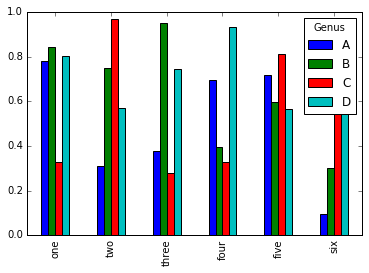

In [28]:
df2.plot(kind="bar")

- 바 플롯을 그릴 때 stacked=True 인자를 넣어주면, 하나의 인덱스에 대한 각 열의 값을 한 줄로 쌓아 표시해줍니다.

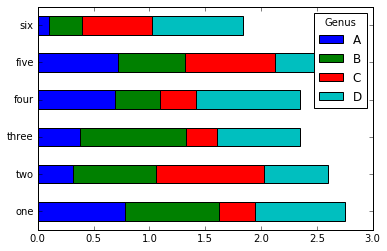

In [29]:
df2.plot(kind="barh", stacked=True)

## 히스토그램(histogram)

 - 히스토그램의 경우 어느 하나의 변수 X가 가질 수 있는 값의 구간을 여러 개 설정한 뒤, 각각의 구간에 속하는 갯수를 막대 형태로 <br>나타낸 플롯입니다. Series로부터 히스토그램을 그릴 때는 인덱스를 따로 명시할 필요가 없으며, 그저 값들만 가지고 있으면 됩니다.


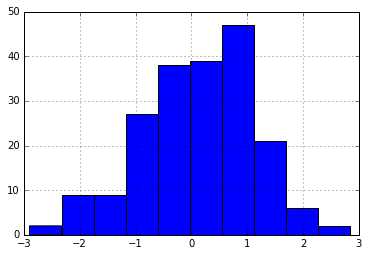

In [33]:
s3 = pd.Series(np.random.normal(0, 1, size=200))
s3.hist()

 - 각 구간에 속하는 값의 갯수를 카운팅할 때, 구간의 개수는 자동으로 10개로 설정되어 있습니다
 - 이 구간을 'bin(빈)'이라고 부릅니다. 여러분이 히스토그램을 그릴 때, 다음과 같이 bin의 갯수를 직접 설정할 수도 있습니다.

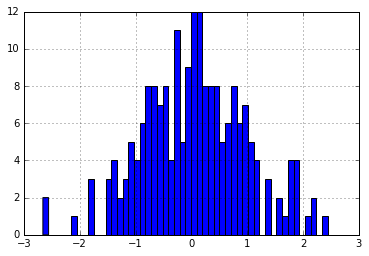

In [31]:
s3.hist(bins=50)

- 만약 normed=True 인자를 넣어주면, 각 bin에 속하는 갯수를 전체 갯수로 나눈 비율, 즉 정규화한(normalized) 값을 사용하여 히스토그램을 그립니다.

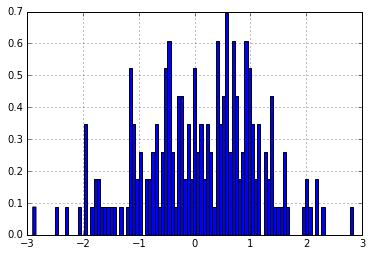

In [34]:
s3.hist(bins=100, normed=True)

## 산점도(scatter plot)
 - 산점도의 경우 이 보다는 서로 다른 두 개의 독립변수 X1, X2 간에 어떠한 관계가 있는지 알아보고자 할 때 일반적으로 많이 사용
 - 즉 산점도는, 두 독립변수 X1과 X2의 값을 각각의 축으로 하여 2차원 평면 상에 점으로 나타낸 플롯입니다.
 
 <br>
 - 랜덤한 값들로 구성된 두 개의 array를 생성한 뒤, np.concatenate() 함수를 사용하여 이들을 열 방향으로 연결합니다.

In [46]:
x1 = np.random.normal(1, 1, size=(100, 1)) # Mean 1 SD 1  100 x 1
x2 = np.random.normal(-2, 4, size=(100, 1)) # Mean -2 SD 4 100 x 1
X = np.concatenate((x1, x2), axis=1)

In [48]:
print(len(x1), len(x2))

100 100


 - 이렇게 생성된 X array를 사옹하여 새로운 DataFrame df3를 생성하면, df3에는 'x1'과 'x2'의 두 개의 열이 포함되어 있습니다. <br>plt.scatter(df3["x1"], df3["x2"])를 실행하면, 두 열 간의 값을 기준으로 산점도를 그립니다.

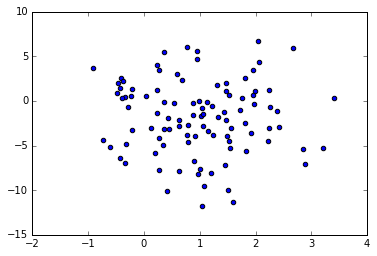

In [49]:
df3 = pd.DataFrame(X, columns=["x1", "x2"])
plt.scatter(df3["x1"], df3["x2"])